In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [2]:
#a)
#Your code:
#remember to use your own directory
df = pd.read_csv('/home/jakub/datascience/kc_house_data.csv')
rows = []
print(df.head(10))

#Hint: read_csv(), head()

           id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7 

In [3]:
#b) 
df.info()

house_categorical_df = (['id','date','waterfront', 'view','zipcode','condition','grade','floors'])
house_numerical_df = (['price','bedrooms','bathrooms','sqft_living','sqft_lot','lat','long','sqft_living15','sqft_lot15','yr_renovated'])
print("caterogrical variables:")
print(house_categorical_df)
print("numerical variables:")
print(house_numerical_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Definition of numerical variables is not very obvious, since it depends on analysis which we are working on. Some variables which contains numbers and indeed we can make some math operations with, can actaully be categorical. Good example is number of bathrooms. We can use it as "flat number of bathrooms" but we can also think of the in category of luxury. Some variables even thought they are number can be easly called categorical, example zip code. It's number but it doesn't have any math meaning.

In [4]:
#c)
#Your code:

df_num = df[house_numerical_df]

description = df_num.describe()

print(description)


#Hint: Function describe()

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

                lat          long  sqft_living15     sqft_lot15  yr_renovated  
count  21613.000000  21613.000000   21613.000000   21613.000000  21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652     84.402258  
std        0.138564      0.140828     685.391304

Some of theam are more important than others, and some are just useless. Missing values make 
them unreadable or abstract and unrealistic. "Count" in my opinion is the most disturbing description part
becouse why would anone need total number of bedrooms or yr_renovated. Still mean price is something customer is most interested in and can compare to mean value of the rest numerical variables

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

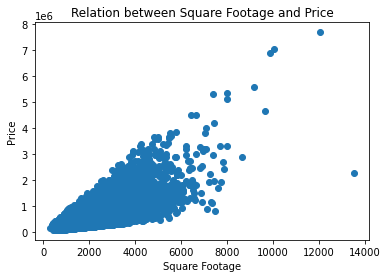

In [5]:
#a)
#Your code:

plt.scatter(df['sqft_living'],df['price'])
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Relation between Square Footage and Price')
plt.show()

#Hint plt.scatter

0.6674342560202366
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


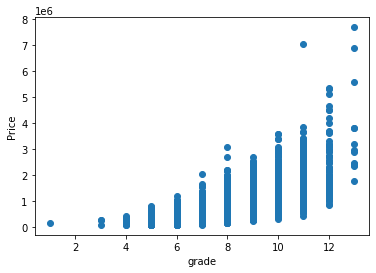

In [6]:
#b)
#Your code:
plt.scatter(df['grade'],df['price'])
plt.xlabel('grade')
plt.ylabel('Price')

correlation = df['price'].corr(df['grade'])
print(correlation)
correlation_with_price = df.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)



We can see that the price is dependent on grade. The gigher grade the more expensice is a house. This tendency is somehow linear but it's not very easy to tell since we dont have very wide grade scale

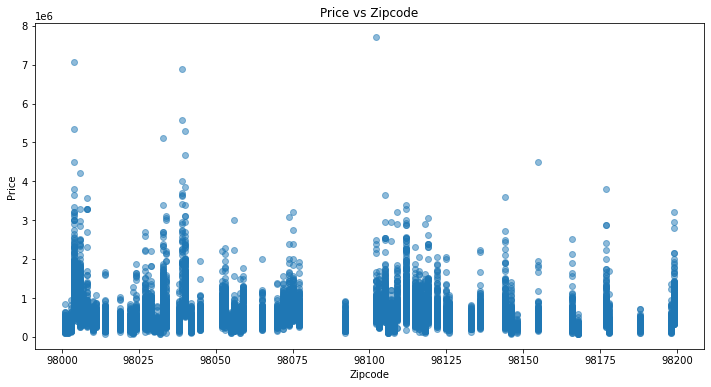

In [7]:
#c)
#Your code:
plt.figure(figsize=(12, 6))
plt.scatter(df['zipcode'], df['price'], alpha=0.5)
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Price vs Zipcode')
plt.show()




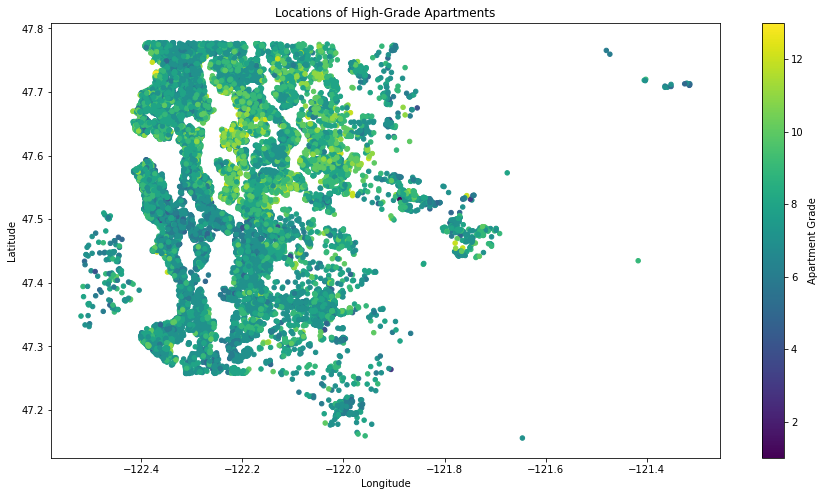

In [8]:

plt.figure(figsize=(15, 8))
plt.scatter(df['long'], df['lat'], c=df['grade'], cmap='viridis', s=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of High-Grade Apartments')
plt.colorbar(label='Apartment Grade')
plt.show()


Interesting thing comes with zipcode and prices since we can see if some areas of the city are more interesting for 
customer. Important thing might be soroundings like mals, acces to work.

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

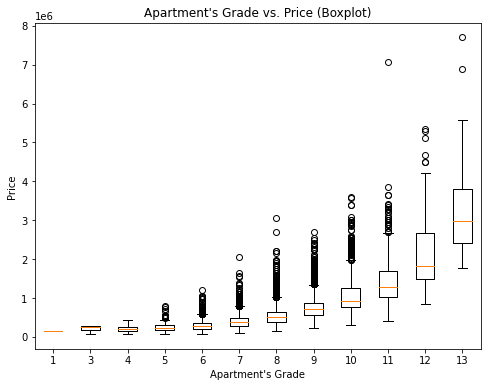

In [9]:
#a)
#Your code:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['grade'] == grade]['price'] for grade in sorted(df['grade'].unique())], labels=sorted(df['grade'].unique()))
plt.xlabel("Apartment's Grade")
plt.ylabel('Price')
plt.title("Apartment's Grade vs. Price (Boxplot)")
plt.show()

#Hint: plt.boxplot

box plot is very similar to plot 2b but its easier to read since it only need one glance to see median, max and min.

In [10]:
!pip install statsmodels

<Figure size 1440x1080 with 0 Axes>

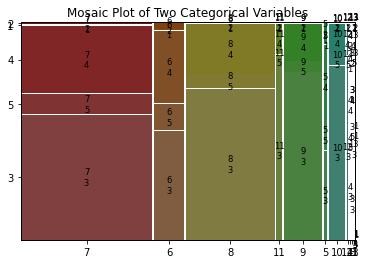

In [11]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(20, 15))

mosaic(df, ['grade', 'condition'], title='Mosaic Plot of Two Categorical Variables')
plt.show()




## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [12]:
#a)
#Your code:
filtred_houses = df.loc[(df['bedrooms'] == 3) & (df['bathrooms'] == 2) & (df['floors'] == 2)]


stats = filtred_houses.describe()


stats


#Hint: pandas.DataFrame.loc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.397177e+09,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.006494,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,284.863636,98085.577922,47.567376,-122.247091,1802.337662,17545.123377
std,2.849813e+09,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.080582,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,700.057328,48.808788,0.143221,0.150507,453.210930,40404.134611
min,7.600057e+06,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,0.000000,98001.000000,47.194700,-122.519000,850.000000,886.000000
25%,2.060901e+09,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,0.000000,98038.500000,47.498800,-122.361750,1452.500000,4020.000000
50%,3.630010e+09,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,0.000000,98103.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,7.184074e+09,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,0.000000,98122.000000,47.682400,-122.149250,2117.500000,10392.250000
max,9.829200e+09,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,1.000000,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,2014.000000,98199.000000,47.777000,-121.709000,3170.000000,273992.000000


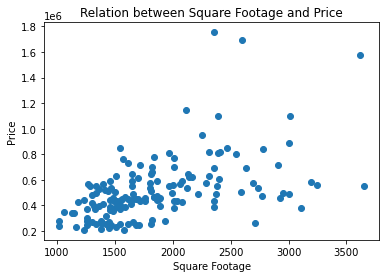

In [13]:
#b)
#Your code:
plt.scatter(filtred_houses['sqft_living'],filtred_houses['price'])
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Relation between Square Footage and Price')
plt.show()


In [19]:
#c)
#Your code:

df_sorted = filtred_houses.sort_values(by='price_to_sqft_ratio')

best_apartment = df_sorted.iloc[0]

print(best_apartment)


#Hint: .loc, .sort_values(), .index

id                          7452500565
date                   20140829T000000
price                           260000
bedrooms                             3
bathrooms                            2
sqft_living                       2710
sqft_lot                          5000
floors                               2
waterfront                           0
view                                 0
condition                            3
grade                                6
sqft_above                        2710
sqft_basement                        0
yr_built                          1951
yr_renovated                         0
zipcode                          98126
lat                            47.5188
long                          -122.373
sqft_living15                      850
sqft_lot15                        5000
price_to_sqft_ratio             95.941
Name: 9704, dtype: object
